In [1]:
import pandas as pd
import numpy as np 
import datetime
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Date      datetime64[ns]
Period             int64
Value            float64
dtype: object


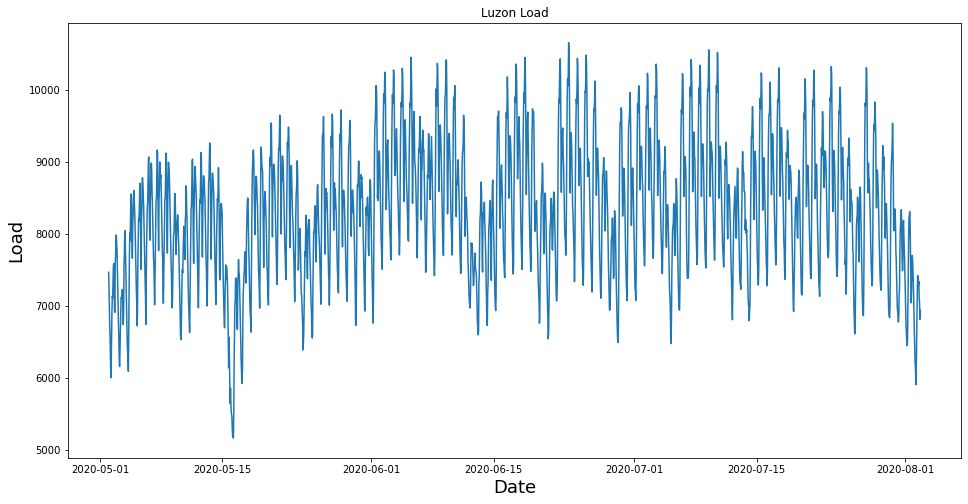

,Date,Period,Value
Date,,,
2020-05-02 00:00:00,2020-05-02 00:00:00,1,7466.0
2020-05-02 01:00:00,2020-05-02 01:00:00,2,7238.1
2020-05-02 02:00:00,2020-05-02 02:00:00,3,6934.5
2020-05-02 03:00:00,2020-05-02 03:00:00,4,6706.9
2020-05-02 04:00:00,2020-05-02 04:00:00,5,6555.9
...,...,...,...
2020-08-02 13:00:00,2020-08-02 13:00:00,14,7340.2
2020-08-02 14:00:00,2020-08-02 14:00:00,15,7115.1
2020-08-02 15:00:00,2020-08-02 15:00:00,16,7032.0


In [3]:
# load data + set time
data = pd.read_csv('4-Volume.csv')

# convert the data type of the column to DateTime
data['Date']= pd.to_datetime(data['Date']) 
print(data.dtypes)
data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.index = data['Date']

plt.figure(figsize=(16, 8))
plt.title('Luzon Load')
plt.plot(data['Value'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load', fontsize=18)
plt.show()

data

In [4]:
# extract data for each period + specific date
data_split = data#.loc[data['Period'] == 18]
# define input sequence
data_seq_train = data_split.loc[data_split["Date"] <= "2020-07-27"]
data_seq_test = data_split.loc[data_split["Date"] > "2020-07-27"]
data_seq_train

,Date,Period,Value
Date,,,
2020-05-02 00:00:00,2020-05-02 00:00:00,1,7466.0
2020-05-02 01:00:00,2020-05-02 01:00:00,2,7238.1
2020-05-02 02:00:00,2020-05-02 02:00:00,3,6934.5
2020-05-02 03:00:00,2020-05-02 03:00:00,4,6706.9
2020-05-02 04:00:00,2020-05-02 04:00:00,5,6555.9
...,...,...,...
2020-07-26 20:00:00,2020-07-26 20:00:00,21,8647.8
2020-07-26 21:00:00,2020-07-26 21:00:00,22,8579.1
2020-07-26 22:00:00,2020-07-26 22:00:00,23,8288.9


In [5]:
# define input sequence
data_seq_train = list(data_seq_train['Value'])
data_seq_test = list(data_seq_test['Value'])

# data_seq_train

In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [6]:
# choose a number of time steps
n_steps = 24
# split into samples
X_train, y_train = split_sequence(data_seq_train, n_steps)
X_test, y_test = split_sequence(data_seq_test, n_steps)

In [7]:
n_features = 1
n_steps = 12
n_seq = 2

# reshape from [samples, timesteps] into [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_seq, n_steps, n_features))

# print(X_train.shape[0], X_train.shape[1])

2041 2


In [8]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),
input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_percentage_error'])
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1, batch_size = 24)

Epoch 1/200
2041/2041 [==============================] - 1s 447us/step - loss: 10178093.7940 - mean_absolute_percentage_error: 24.3940
Epoch 2/200
2041/2041 [==============================] - 0s 122us/step - loss: 1070234.8037 - mean_absolute_percentage_error: 8.9386
Epoch 3/200
2041/2041 [==============================] - 0s 128us/step - loss: 1039824.5047 - mean_absolute_percentage_error: 9.3671
Epoch 4/200
2041/2041 [==============================] - 0s 129us/step - loss: 577616.1586 - mean_absolute_percentage_error: 7.5842
Epoch 5/200
2041/2041 [==============================] - 0s 122us/step - loss: 576790.9886 - mean_absolute_percentage_error: 7.5725
Epoch 6/200
2041/2041 [==============================] - 0s 123us/step - loss: 565913.6002 - mean_absolute_percentage_error: 7.4898
Epoch 7/200
2041/2041 [==============================] - 0s 127us/step - loss: 560394.8619 - mean_absolute_percentage_error: 7.4972
Epoch 8/200
2041/2041 [==============================] - 0s 177us/step 

2041/2041 [==============================] - 0s 117us/step - loss: 82943.4035 - mean_absolute_percentage_error: 2.7288
Epoch 124/200
2041/2041 [==============================] - 0s 120us/step - loss: 76576.0740 - mean_absolute_percentage_error: 2.6472
Epoch 125/200
2041/2041 [==============================] - 0s 121us/step - loss: 71010.5917 - mean_absolute_percentage_error: 2.5126
Epoch 126/200
2041/2041 [==============================] - 0s 118us/step - loss: 73742.4078 - mean_absolute_percentage_error: 2.5694
Epoch 127/200
2041/2041 [==============================] - 0s 121us/step - loss: 69323.7223 - mean_absolute_percentage_error: 2.4878
Epoch 128/200
2041/2041 [==============================] - 0s 119us/step - loss: 74769.2496 - mean_absolute_percentage_error: 2.5929
Epoch 129/200
2041/2041 [==============================] - 0s 124us/step - loss: 79907.2360 - mean_absolute_percentage_error: 2.6985
Epoch 130/200
2041/2041 [==============================] - 0s 117us/step - loss: 71

In [9]:
# demonstrate prediction
y_test_hat = model.predict(X_test, verbose=0)
y_test = list(y_test)
for i in range(len(y_test_hat)):
    print(y_test_hat[i]-y_test[i])

[231.90479]
[62.533203]
[8.955078]
[-180.89307]
[-9.630859]
[131.97656]
[-470.43506]
[-32.359375]
[107.68848]
[160.04297]
[259.3994]
[185.11426]
[49.359375]
[91.1543]
[36.3125]
[246.38477]
[394.10254]
[-234.18848]
[-16.761719]
[293.34082]
[228.72168]
[-30.024414]
[1.9140625]
[357.15186]
[238.14404]
[20.143066]
[4.9936523]
[-81.83057]
[73.20215]
[275.10596]
[-179.38428]
[78.4541]
[212.89258]
[-183.00293]
[335.85742]
[499.63672]
[118.47754]
[70.21875]
[15.061523]
[284.2827]
[303.8872]
[-356.42578]
[262.54102]
[308.60156]
[310.5459]
[295.60938]
[46.62793]
[191.47998]
[208.76855]
[109.21387]
[140.92627]
[-50.01123]
[155.78516]
[256.29053]
[-87.64697]
[-245.93213]
[-25.326172]
[-42.478516]
[80.98828]
[-66.56445]
[-183.62207]
[97.890625]
[174.39062]
[431.28955]
[222.40088]
[-357.10303]
[3.5566406]
[333.0078]
[133.80273]
[170.40625]
[201.54443]
[258.08105]
[211.83887]
[24.527344]
[-100.532715]
[-265.43262]
[45.037598]
[328.82373]
[162.99023]
[551.5669]
[91.88135]
[-6.9067383]
[145.41064]
[74.

In [10]:
# calcute MAPE Error on test data

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(y_test, y_test_hat)
MAPE  #12.542730695898976  64-32  12.6605301320  128 64

12.869626517506624

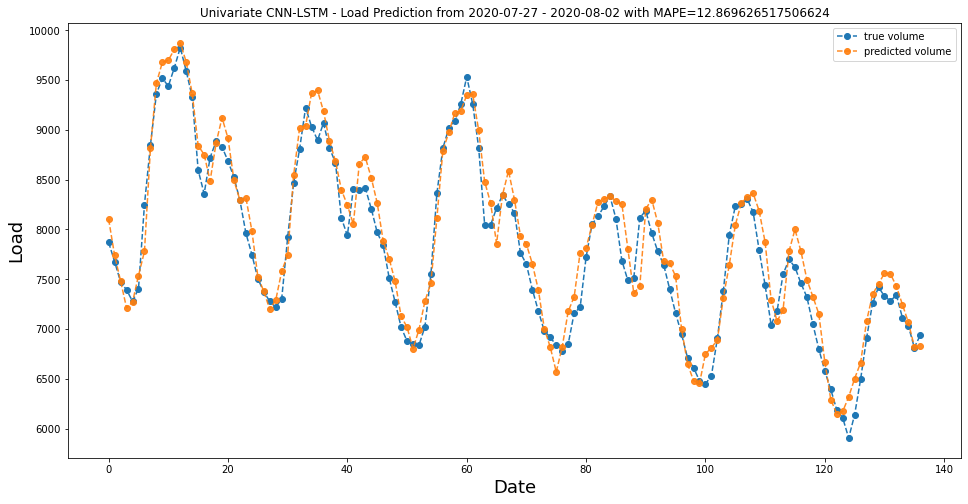

In [11]:
# plot the y_test and y_test_hat (prediction on test data)
plt.figure(figsize=(16, 8))
plt.title('Univariate CNN-LSTM - Load Prediction from 2020-07-27 - 2020-08-02 with MAPE='+ str(MAPE))
plt.plot(y_test, 'o--', alpha=1)
plt.plot(y_test_hat, 'o--', alpha=0.9)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load', fontsize=18)
plt.legend(['true volume', 'predicted volume'], loc='upper right')

plt.show()


# Visuliza Model + RMSE + Weights

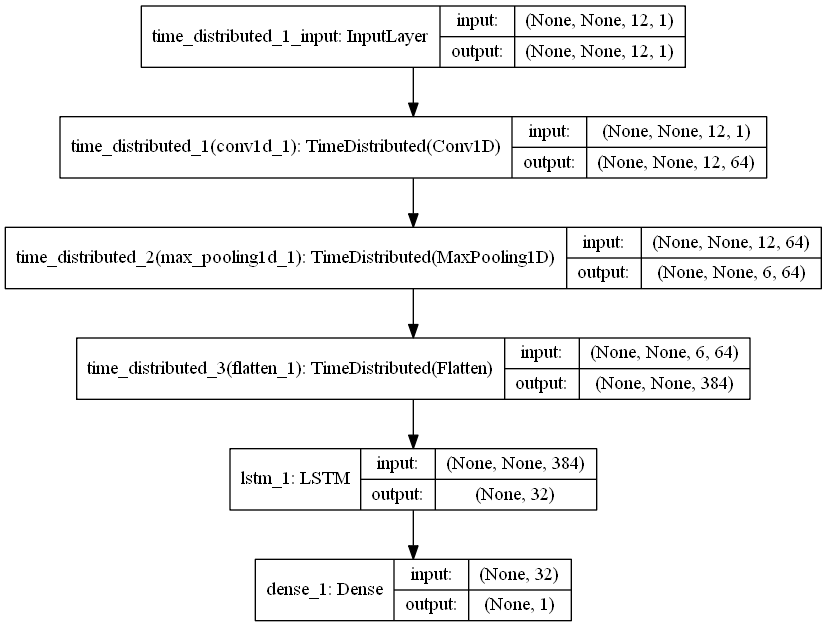

In [12]:
from keras.utils.vis_utils import plot_model
# pip install pydot
# conda install python-graphviz

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

RMSE=measure_rmse(y_test, y_test_hat)
RMSE

229.4370357426067

In [14]:
for layer in model.layers:
    weights = layer.get_weights() 
    
weights

[array([[-0.08640381],
        [-0.32616642],
        [ 0.174873  ],
        [ 0.2282178 ],
        [ 0.15778476],
        [ 0.2728142 ],
        [ 0.09763062],
        [ 0.24067661],
        [-0.35844016],
        [ 0.26694536],
        [-0.00856113],
        [-0.12870911],
        [-0.24616219],
        [-0.05327061],
        [ 0.04154885],
        [-0.321431  ],
        [ 0.38335323],
        [ 0.4209379 ],
        [ 0.35334358],
        [ 0.3960302 ],
        [-0.3858717 ],
        [-0.09942973],
        [-0.24998493],
        [ 0.12507862],
        [ 0.15764576],
        [ 0.20992935],
        [-0.10101646],
        [-0.1360356 ],
        [-0.15757999],
        [-0.05358902],
        [-0.36777896],
        [ 0.01331517]], dtype=float32),
 array([0.26723582], dtype=float32)]